<a href="https://colab.research.google.com/github/MonikaBarget/atr-historical-research/blob/main/colab-notebooks/colab_img_gptvision4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook reconstructs an image processing workflow recommended by GPT Vision 4 to better prepare a low-quality scan for OCR. The intention of this notebook is to critically evaluate AI-recommendations for image processing as opposed to earlier decisions taken by the DigiKAR team. The packages and operations below were explicitly recommended by GPT Vision 4, which reproduces the visual output that Monika Barget also received when prompting directly in the ChatGPT user interface. For the initial prompting, Monika Barget used a page from the 1740 "Staatskalender" published in the Electorate of Mainz. Instances where the script below diverts from the GPT Vision 4 recommendations are highlighted in the comments.

In [10]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Set output directory
output_dir = "/content/drive/My Drive/Colab Notebooks/OCR_outputs"
import os
os.makedirs(output_dir, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Import packages recommended by ChatGPT

import cv2
import numpy as np
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Confirm import for users
print("Import successful!")

Import successful!


The sections defining paths below and loading the image have been specifically added for the BYOD workshop participants and are not part of the GPT 4 - Vision workflow.

In [30]:
# Define GitHub repository and local path
git_repo_url = "https://github.com/MonikaBarget/atr-historical-research"
local_repo_path = "/content/atr-historical-research"

# Clone the repository (if not already cloned)
if not os.path.exists(local_repo_path):
    !git clone {git_repo_url} {local_repo_path}

# Define the local path to the sample_data_JPG folder
# use path to your own jpg images if you want
gitpath = os.path.join(local_repo_path, "sample_data_jpg")

# Check if the directory exists
if os.path.exists(gitpath):
    # List all files recursively in the folder
    filenames = []
    for root, dirs, files in os.walk(gitpath):
        for file in files:
            filenames.append(os.path.join(root, file))

    # Print the collected filenames
    for filename in filenames:
        print(filename)
else:
    print(f"Directory '{gitpath}' does not exist. Check the repo structure.")


/content/atr-historical-research/sample_data_jpg/MayntzErstenBischoeffe_Page_2.jpg
/content/atr-historical-research/sample_data_jpg/MayntzErstenBischoeffe_Page_4.jpg
/content/atr-historical-research/sample_data_jpg/MayntzErstenBischoeffe_Page_6.jpg
/content/atr-historical-research/sample_data_jpg/MayntzErstenBischoeffe_Page_5.jpg
/content/atr-historical-research/sample_data_jpg/MayntzErstenBischoeffe_Page_1.jpg
/content/atr-historical-research/sample_data_jpg/MayntzErstenBischoeffe_Page_3.jpg


In [31]:
# Select the first image
first_image = os.path.join(filenames[0])

# Confirm selection for users
print(f"Using first found image: {first_image}")

Using first found image: /content/atr-historical-research/sample_data_jpg/MayntzErstenBischoeffe_Page_2.jpg


In [32]:
# Load the image in grayscale (GPT-Vision-4 recommendation)
image = cv2.imread(first_image, cv2.IMREAD_GRAYSCALE) # This AI-"decision" is problematic!

# Error handling added for BYOD lab workshop
if image is None:
    raise ValueError(f"Could not load image: {first_image}")
else:
    print("Valid image loaded!")

Valid image loaded!


Enhanced image saved as: /content/drive/My Drive/Colab Notebooks/OCR_outputs/enhanced_image.jpg


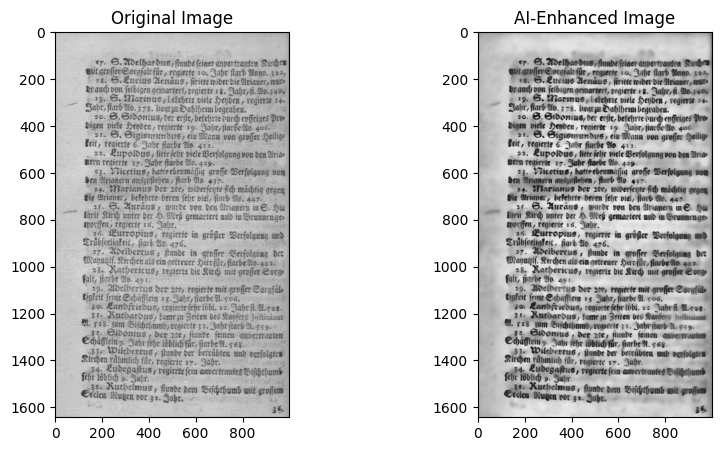

In [35]:
# Image enhancement workflow as created by GPT-Vision-4
# users are welcome to adjust the values and test alternative results

# The main library used here is OpenCV, which Monika Barget also used in her much shorter and simpler
# script for the DigiKAR project.

# OpenCV (Open Source Computer Vision Library) is an open source computer vision and
# machine learning software library. We should discuss how many of its modules make sense for OCR image
# preparation.

# Full documentation: https://docs.opencv.org/4.x/index.html

# Step 1: Noise Reduction using Non-Local Means Denoising
denoised = cv2.fastNlMeansDenoising(image, h=30, templateWindowSize=7, searchWindowSize=21)

# Step 2: Adaptive Contrast Enhancement using CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
contrast_enhanced = clahe.apply(denoised)

# Step 3: Text-Specific Sharpening to Enhance Borders
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(contrast_enhanced, -1, kernel)

# Convert to PIL for saving and visualization
enhanced_image = Image.fromarray(sharpened)

# Define output file path
output_filename = "enhanced_image.jpg"  # Set your desired filename
output_filepath = os.path.join(output_dir, output_filename)

# Save the processed image as JPG
enhanced_image.save(output_filepath, format="JPEG")
print(f"Enhanced image saved as: {output_filepath}")

# Display the Original vs Enhanced Image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(sharpened, cmap='gray')
plt.title("AI-Enhanced Image")

plt.show()


Original AI-prompting and code adjustments by Monika Barget, Maastricht University, in January 2025 for the Bring Your Own Data Labs workshop.